<a href="https://colab.research.google.com/github/FahmidaMitu/COVID-19-Severity-Detection-from-Lung-CT-Scan-Images-using-CNN/blob/codes/VGG16_with_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2

classified_path = ''
zero_path = classified_path + '0/'
one_path = classified_path + '1/'
two_path = classified_path + '2/'
three_path = classified_path + '3/'
four_path = classified_path + '4/'
five_path = classified_path + '5/'


In [ ]:
labels = ( 'Severe', 'Normal', 'Moderate', 'Minimal', 'Extent', 'Critical')
print(labels)

('Severe', 'Normal', 'Moderate', 'Minimal', 'Extent', 'Critical')


In [ ]:
severity = None
x = []
y = []
img_size=(224,224)
import matplotlib.pyplot as plt
import cv2
def make_whole_dataset(directory, severity):
    try:
        for img in os.listdir(directory):
            path = os.path.join(directory,img)
            img_array = cv2.imread(path,cv2.IMREAD_COLOR)
            img_array = cv2.resize(img_array,img_size)
            x.append(np.array(img_array))
            y.append(str(severity))
    except:
        None

In [ ]:
make_whole_dataset(zero_path, 'Severe')
make_whole_dataset(one_path, 'Normal')
make_whole_dataset(two_path, 'Moderate')
make_whole_dataset(three_path, 'Minimal')
make_whole_dataset(four_path, 'Extent')
make_whole_dataset(five_path, 'Critical')

In [ ]:
print(len(x))
print(len(y))

3053
3053


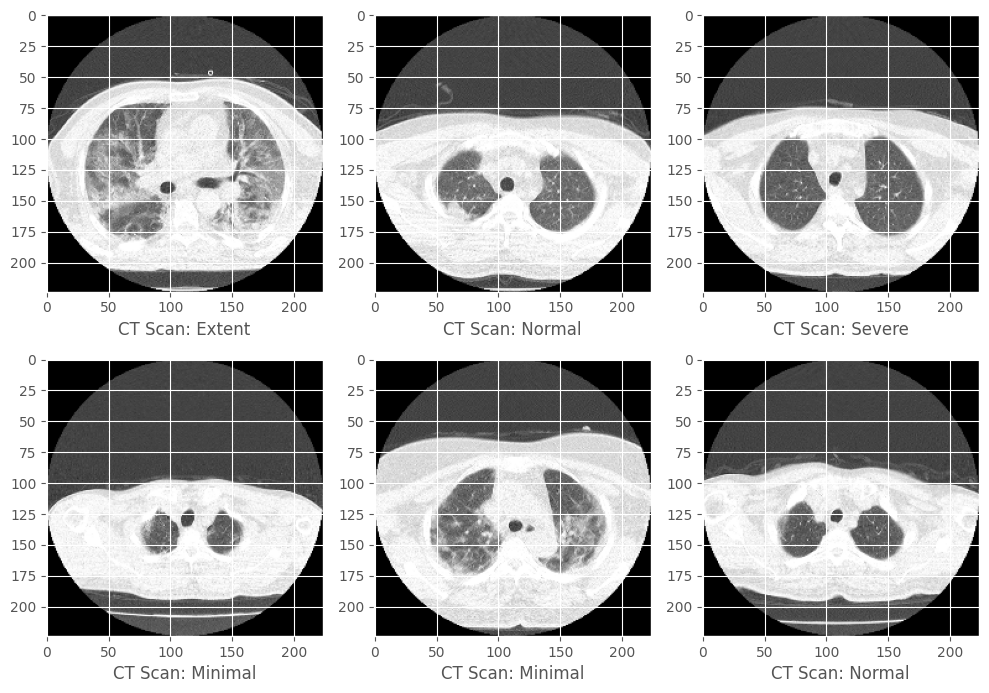

In [ ]:
import random

plt.style.use('ggplot')
fig = plt.figure(figsize=(12,10))
fig.set_size_inches(10,10)
for i in range(6):
    plt.subplot(3,3,i+1)
    sample = random.randint(0,len(y))
    plt.imshow(x[sample])
    plt.xlabel("CT Scan: {}".format(y[sample]))
    
plt.tight_layout()

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y,6)

In [ ]:
from sklearn.model_selection import train_test_split
x = np.array(x)
x = x/255.0
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input, Lambda, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import efficientnet as efn
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import tensorflow.keras.optimizers
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

VGG16

In [ ]:
new_input = Input(shape=(224, 224, 3))
vgg16 = VGG16(weights='imagenet', include_top=False, input_tensor=new_input, pooling='avg')

for layers in vgg16.layers:
    layers.trainable = False
x = vgg16.layers[-2].output
x = Flatten()(x)

predictions = Dense(6, activation='softmax')(x)
vgg16_model = Model(inputs=vgg16.input, outputs = predictions)

In [ ]:
vgg16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
num_epochs = 100
history = vgg16_model.fit(x_train, y_train,
                         validation_data=(x_test, y_test),
                         epochs = num_epochs)

Epoch 1/30
77/77 [==============================] - 29s 219ms/step - loss: 1.3141 - accuracy: 0.5315 - val_loss: 0.7683 - val_accuracy: 0.6923
Epoch 2/30
77/77 [==============================] - 14s 183ms/step - loss: 0.6939 - accuracy: 0.7244 - val_loss: 0.6144 - val_accuracy: 0.7643
Epoch 3/30
77/77 [==============================] - 14s 185ms/step - loss: 0.5218 - accuracy: 0.7944 - val_loss: 0.5862 - val_accuracy: 0.7676
Epoch 4/30
77/77 [==============================] - 14s 187ms/step - loss: 0.4324 - accuracy: 0.8436 - val_loss: 0.7190 - val_accuracy: 0.7038
Epoch 5/30
77/77 [==============================] - 14s 188ms/step - loss: 0.4433 - accuracy: 0.8202 - val_loss: 0.6267 - val_accuracy: 0.7250
Epoch 6/30
77/77 [==============================] - 15s 190ms/step - loss: 0.3192 - accuracy: 0.8849 - val_loss: 0.6364 - val_accuracy: 0.7234
Epoch 7/30
77/77 [==============================] - 15s 193ms/step - loss: 0.2666 - accuracy: 0.9136 - val_loss: 0.4688 - val_accuracy: 0.8200

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = vgg16_model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)

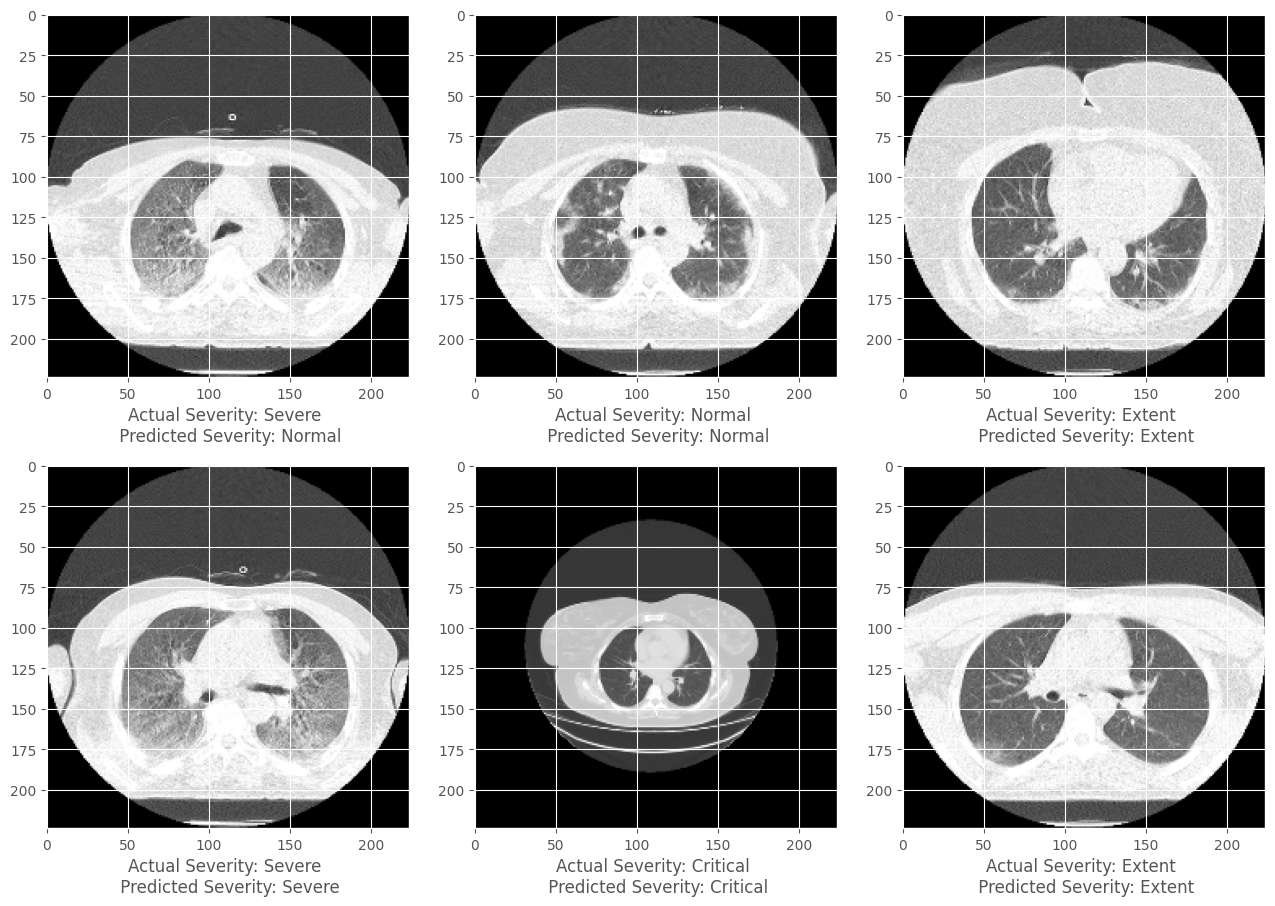

In [ ]:
import random
plt.style.use('ggplot')
fig = plt.figure(figsize=(12,10))
fig.set_size_inches(13,13)
for i in range(6):
    plt.subplot(3,3,i+1)
    sample = random.randint(0,len(y_test)-1)
    plt.imshow(x_test[sample])
    var = np.argmax(y_test[sample])
    plt.xlabel("Actual Severity: {} \n Predicted Severity: {}".format(labels[var], labels[y_pred[sample]]))
    
plt.tight_layout()

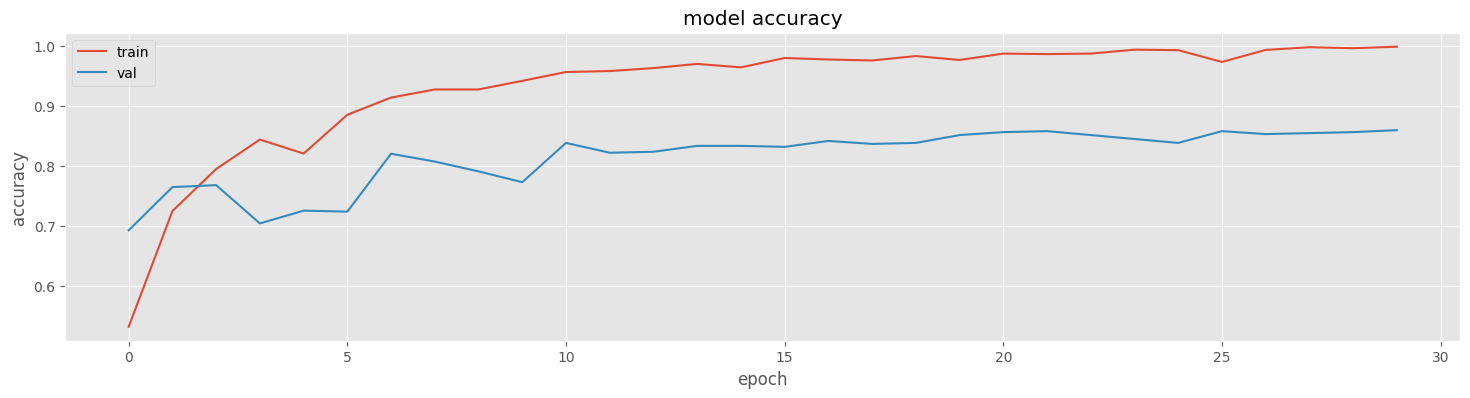

In [ ]:
plt.figure(figsize=(18,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

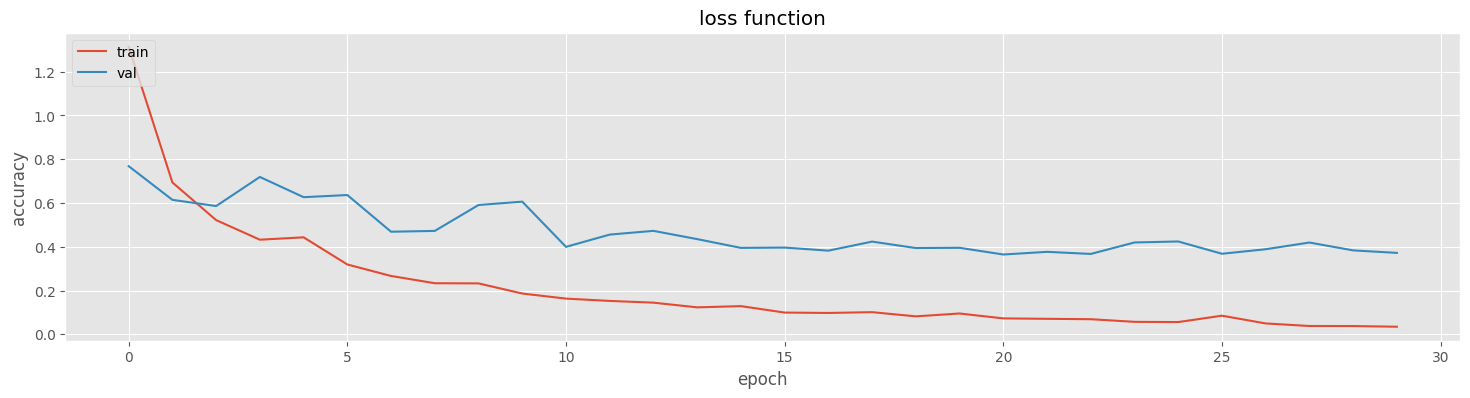

In [ ]:
plt.figure(figsize=(18,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()